In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [32]:
plt.rcParams.update({
    'font.size': 12,            # Base font size for the plot
    'font.family': 'Times New Roman',  # Font style (IEEE recommends Times New Roman)
    'axes.labelsize': 12,       # Font size for axis labels
    'axes.titlesize': 12,       # Font size for the title
    'legend.fontsize': 10,      # Font size for the legend
    'xtick.labelsize': 10,      # Font size for x-axis tick labels
    'ytick.labelsize': 10,      # Font size for y-axis tick labels
    'lines.linewidth': 1.0,    # Line width for plot lines
    'lines.markersize': 4,     # Marker size
    'figure.figsize': [3.5, 2.5], # Size of the figure (width x height) in inches
    'savefig.dpi': 300,        # Resolution of the output figure
    'legend.loc': 'best',      # Location of the legend
    'legend.frameon': False,   # Remove the box frame around legends
    'pdf.fonttype': 42,        # Embedding fonts in PDF for compatibility
    'ps.fonttype': 42
})

In [11]:
base_path = os.getcwd()
data = pd.read_csv(r'C:\Users\14914\Desktop\lectures\SwissPDGs-TimeSeries\MV_data\Zurich_2015-2024.csv')
data = data.iloc[:, :-1]
# delete data begin with 2024
data = data[data['Timestamp'].str.contains('2024') == False]
df=data.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%dT%H:%M:%S%z', errors='coerce',utc=True)
# add one hour to the time
df['Timestamp'] = df['Timestamp'] + pd.DateOffset(hours=1)
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['year'] = df['Timestamp'].dt.year
df['Value_NE5'] = df['Value_NE5']/max(df['Value_NE5'])
monthly_24h_profile = df.groupby(['Month', 'Hour'])['Value_NE5'].mean().reset_index()
monthly_24h_profile['Value_NE5']=monthly_24h_profile['Value_NE5']
monthly_24h_profile_pivot = monthly_24h_profile.pivot_table(
    index=['Hour'],
    columns='Month',
    values='Value_NE5'
)

In [12]:
df

,Timestamp,Value_NE5,Month,Hour,Minute,year
0,2015-01-01 00:15:00+00:00,0.513972,1,0,15,2015
1,2015-01-01 00:30:00+00:00,0.509303,1,0,30,2015
2,2015-01-01 00:45:00+00:00,0.510356,1,0,45,2015
3,2015-01-01 01:00:00+00:00,0.513180,1,1,0,2015
4,2015-01-01 01:15:00+00:00,0.518365,1,1,15,2015
...,...,...,...,...,...,...
315546,2023-12-31 22:45:00+00:00,0.470813,12,22,45,2023
315547,2023-12-31 23:00:00+00:00,0.468313,12,23,0,2023
315548,2023-12-31 23:15:00+00:00,0.466364,12,23,15,2023
315549,2023-12-31 23:30:00+00:00,0.460644,12,23,30,2023


In [13]:
df_test=df.groupby(['Month','Hour','year'])['Value_NE5'].mean().reset_index()
df_test['Value_NE5']=df_test['Value_NE5']
df_test

,Month,Hour,year,Value_NE5
0,1,0,2015,0.524263
1,1,0,2016,0.533196
2,1,0,2017,0.536510
3,1,0,2018,0.488188
4,1,0,2019,0.510143
...,...,...,...,...
2587,12,23,2019,0.496266
2588,12,23,2020,0.510510
2589,12,23,2021,0.545661
2590,12,23,2022,0.506322


In [14]:
mean ={}
std ={}
for i in range(1,13):
    for j in range(0,24):
        mean[(i,j)]=df_test[(df_test['Month']==i) & (df_test['Hour']==j)]['Value_NE5'].mean()
        std[(i,j)]=df_test[(df_test['Month']==i) & (df_test['Hour']==j)]['Value_NE5'].std()

In [15]:
mean

{(1, 0): 0.5155075505459727,
 (1, 1): 0.47646767396084044,
 (1, 2): 0.4607940645632616,
 (1, 3): 0.45806689684153323,
 (1, 4): 0.4612874404220485,
 (1, 5): 0.5042483161859619,
 (1, 6): 0.5863080096304629,
 (1, 7): 0.6539154245224013,
 (1, 8): 0.6929795666408358,
 (1, 9): 0.7075277570756138,
 (1, 10): 0.7195583303746059,
 (1, 11): 0.7191754115283273,
 (1, 12): 0.7143166078409153,
 (1, 13): 0.7098470946175358,
 (1, 14): 0.7061239775944076,
 (1, 15): 0.7027852414687976,
 (1, 16): 0.6998241653302522,
 (1, 17): 0.686219352227067,
 (1, 18): 0.6634592785442028,
 (1, 19): 0.6340775112156316,
 (1, 20): 0.5993228961167859,
 (1, 21): 0.5606188768291314,
 (1, 22): 0.542268621634379,
 (1, 23): 0.5255261717205574,
 (2, 0): 0.5177955255136276,
 (2, 1): 0.47680967586980066,
 (2, 2): 0.4618697328125488,
 (2, 3): 0.45943309178238706,
 (2, 4): 0.46304553870755694,
 (2, 5): 0.5078088170480842,
 (2, 6): 0.5945074327541398,
 (2, 7): 0.6657695585788862,
 (2, 8): 0.7033352269946954,
 (2, 9): 0.715831152082178

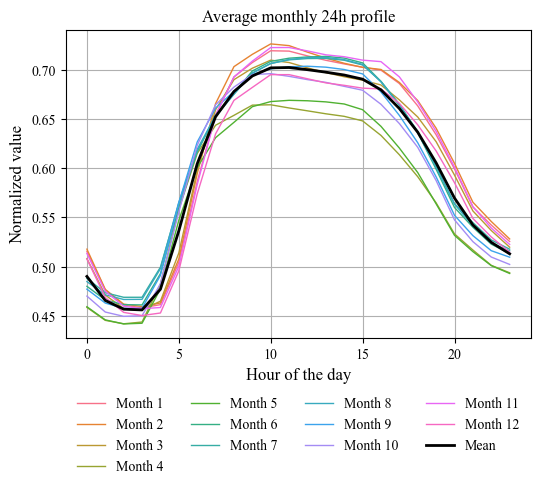

In [33]:
# Plot 24h profile for each month
# create folder Pictures if it doesn't exist
import os
if not os.path.exists('Pictures'):
    os.makedirs('Pictures')
colors = sns.color_palette("husl", 12)
# Plot setup
fig, ax = plt.subplots(figsize=(6, 4))
# Plot each month with its respective color and label
for i in range(1, 13):
    plt.plot(monthly_24h_profile_pivot[i], label=f'Month {i}', color=colors[i-1])
# Plot the mean with a thicker black line
plt.plot(monthly_24h_profile_pivot.mean(axis=1), label='Mean', color='black', linewidth=2)
# Set labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Normalized value')
plt.title('Average monthly 24h profile')

# Set legend below the plot, with "Mean" after the months
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Add grid
plt.grid()

# Save the figure with tight layout
plt.savefig('Pictures/24h_profile.png', dpi=300, bbox_inches='tight')

plt.show()


In [27]:
monthly_24h_profile_pivot.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Month')

In [75]:
# export every month to csv
# create folder
import os
if not os.path.exists('MV_DATA/monthly_24h_profile'):
    os.makedirs('MV_DATA/monthly_24h_profile')
for month in monthly_24h_profile_pivot.columns:
    df = pd.DataFrame(monthly_24h_profile_pivot[month]).reset_index()
    df.columns = ['Hour', 'Scaled Value']
    df.to_csv(f'MV_DATA/monthly_24h_profile/avg_month_{month}.csv', header=True, index=False)


In [41]:
# calculate the average 24h profile of all months and save it to csv
average_24h_profile = monthly_24h_profile_pivot.mean(axis=1)
df = pd.DataFrame(average_24h_profile).reset_index()
df.columns = ['Hour', 'Scaled Value']
df.to_csv('MV_DATA/monthly_24h_profile/average_24h_profile.csv', header=True, index=False)

In [42]:
average_24h_profile

Hour
0     0.489991
1     0.465532
2     0.456690
3     0.455932
4     0.476972
5     0.536378
6     0.604535
7     0.652407
8     0.678073
9     0.693883
10    0.702151
11    0.702482
12    0.700292
13    0.697758
14    0.694868
15    0.690641
16    0.679796
17    0.660785
18    0.636695
19    0.605523
20    0.569687
21    0.542346
22    0.524690
23    0.513002
dtype: float64

In [101]:
df_2021 = df[df['year'] == 2023]
# calculate the average 24h profile for every month in 2021
monthly_24h_profile_2021 = df_2021.groupby(['Month', 'Hour'])['Value_NE5'].mean().reset_index()
monthly_24h_profile_2021['Value_NE5']=monthly_24h_profile_2021['Value_NE5']/max(monthly_24h_profile_2021['Value_NE5'])
monthly_24h_profile_pivot_2021 = monthly_24h_profile_2021.pivot_table(
    index=['Hour'],
    columns='Month',
    values='Value_NE5')

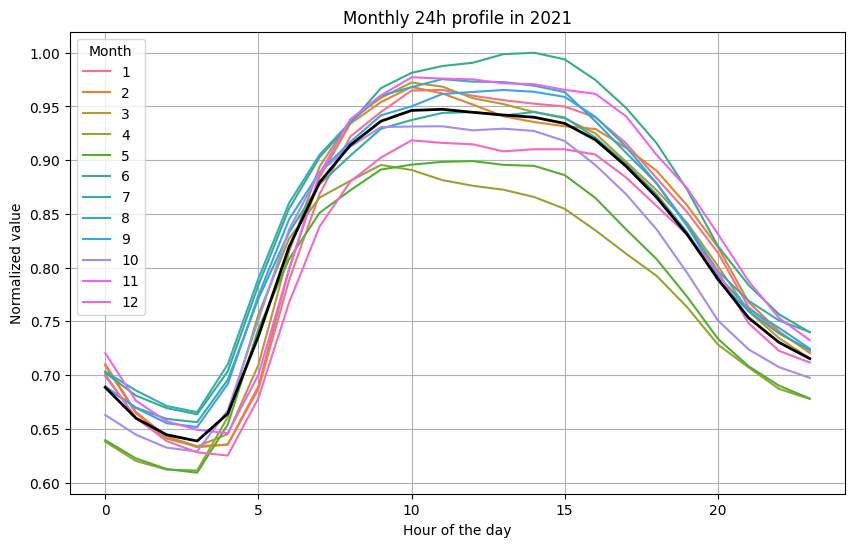

In [102]:
#plot 24h profile for each month in 2021
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(1,13):
    plt.plot(monthly_24h_profile_pivot_2021[i],label='Month',color=colors[i-1])
plt.plot(monthly_24h_profile_pivot_2021.mean(axis=1), label='Mean', color='black', linewidth=2)
plt.xlabel('Hour of the day')
plt.ylabel('Normalized value')
plt.title('Monthly 24h profile in 2021')
plt.legend(monthly_24h_profile_pivot_2021.columns, title='Month')
plt.grid()
plt.show()


In [58]:
std = pd.DataFrame.from_dict(std, orient='index', columns=['std'])

In [71]:
std.iloc[24*11:48*12,0]

(12, 0)     0.016266
(12, 1)     0.015472
(12, 2)     0.014732
(12, 3)     0.014846
(12, 4)     0.017020
(12, 5)     0.018145
(12, 6)     0.025077
(12, 7)     0.030597
(12, 8)     0.033095
(12, 9)     0.033116
(12, 10)    0.033124
(12, 11)    0.033846
(12, 12)    0.032244
(12, 13)    0.031942
(12, 14)    0.030417
(12, 15)    0.029459
(12, 16)    0.031147
(12, 17)    0.031393
(12, 18)    0.030759
(12, 19)    0.027134
(12, 20)    0.022696
(12, 21)    0.020775
(12, 22)    0.019641
(12, 23)    0.017482
Name: std, dtype: float64

In [67]:
for i in range(1,13):
    std_month = pd.DataFrame()
    std_month['Hour'] = range(0,24)
    std_month['std'] = std.iloc[24*(i-1):24*i,0].values
    std_month.reset_index(drop=True, inplace=True)
    std_month.to_csv(f'MV_DATA/monthly_24h_profile/std_month_{i}.csv', header=True, index=False)

    

In [69]:
std_month

,Hour,std
0,0,0.016266
1,1,0.015472
2,2,0.014732
3,3,0.014846
4,4,0.017020
5,5,0.018145
6,6,0.025077
7,7,0.030597
8,8,0.033095
9,9,0.033116
